In [37]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
import scipy.integrate
from matplotlib.pyplot import figure

In [38]:
import sys
np.set_printoptions(threshold=sys.maxsize)

### Problem 1 

In [39]:
# Define the function
def rhsfunc(x, y, ep):
    f1 = y[1]
    f2 = (x**2 - ep) * y[0]
    
    return np.array([f1,f2])

In [40]:
# Define some constants 
K = 1
L = 4
ep_start = 0
tol = 10**(-6) 

xp = [-L, L]
x_evals = np.linspace(-L,L,20*L+1) 

In [41]:
ep = ep_start
dep = K/100 

In [42]:
# Define our initial conditions 
y0 = np.array([1,((K*L**2)-ep)**.5])

In [43]:
A6 = np.array([])
A = {}

for modes in range(5):
    ep = ep_start
    dep = K/100
    
    
    for j in range(1000): # using for loop to make sure it stops. 
        sol = scipy.integrate.solve_ivp(lambda x,y: rhsfunc(x,y,ep), xp, y0, t_eval = x_evals)
        y_sol = sol.y[0,:] # f1 
        y_sol_dx = sol.y[1,:] #f2 
        
        # Normalize eigenfunction
        y_sol_norm = y_sol/(np.sqrt(scipy.integrate.trapz(y_sol**2, x_evals)))

        if np.abs(y_sol_dx[-1] + (((K*L**2)-ep)**.5)*y_sol[-1]) < tol:
#             print('We got the eigenvalue:', ep)
            A6 = np.append(A6, ep)
            break 

        if (-1)**(modes)*(y_sol_dx[-1] + (((K*L**2)-ep)**.5)*y_sol[-1]) > tol:
            ep = ep + dep # Increase 
        else: 
            ep = ep - dep/2 # Decrease 
            dep = dep/2 # Cut dep in half to make sure we converge 

        y0 = np.array([1,((K*L**2)-ep)**.5])
        
    A[modes] = y_sol_norm
    
    ep_start = ep + 0.1
    

#     plt.plot(sol.t, y_sol_norm, linewidth=2)
#     plt.plot(sol.t, 0*sol.t, 'k')

In [44]:
A1 = np.abs(A[0].copy()).reshape(81,1)
A2 = np.abs(A[1].copy()).reshape(81,1)
A3 = np.abs(A[2].copy()).reshape(81,1)
A4 = np.abs(A[3].copy()).reshape(81,1)
A5 = np.abs(A[4].copy()).reshape(81,1)

In [45]:
A6 = A6.reshape(1,5)

### Problem 2

In [46]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
import scipy.integrate
from matplotlib.pyplot import figure

In [47]:
# Define some constants 
K = 1
L = 4

xp = [-L, L]
x_evals = np.linspace(-L,L,20*L+1) 
deltax = x_evals[1] - x_evals[0]

In [48]:
Diagonal = np.array([])
for x in x_evals[1:80]:
#     d = (2/(deltax**2))+(K*(x**2))
    d = (2)+(K*(x**2)*deltax**2)
    Diagonal = np.append(Diagonal,d)
    
Upper = (-1)*np.ones(x_evals.shape[0]-3)
Lower = (-1)*np.ones(x_evals.shape[0]-3);
A = np.diag(Diagonal) + np.diag(Upper, 1) + np.diag(Lower, -1)
# A

In [49]:
# Changing left end point boundary conditions
A[0,0] = ((-4/3)+2) + (deltax**2*K*x_evals[1]**2)
A[0,1] = (1/3)-1

In [50]:
# # Changing right end point boundary conditions
A[78,-1] = ((-4/3)+2) + (deltax**2*K*x_evals[1]**2)
A[78,-2] = (1/3)-1

In [51]:
w, v = np.linalg.eig(A) 

### Eigenvalues

In [52]:
sort_id = np.argsort(w)
w = w[sort_id]
v = v[:,sort_id]

In [53]:
w = w/(deltax**2)

In [54]:
A12 = np.abs(w[0:5])

In [55]:
# Obtain the eigenvalues
A12 = np.abs(w[0:5])
A12 = A12.reshape(1,5)
# A12 = A12/(deltax**2)

### Eigenfunctions

In [56]:
phi_0 = np.array([])

for n in range(0,v.shape[0]):
    k = (4*v[1,n] - v[0,n])/(3+(2*deltax*np.sqrt(K*L**2 - w[n])))
    phi_0 = np.append(phi_0,k)

/var/folders/f0/bl2j7q556r10y_kd0rb6qwyh0000gn/T/ipykernel_8821/2234637486.py:4: RuntimeWarning: invalid value encountered in sqrt
  k = (4*v[1,n] - v[0,n])/(3+(2*deltax*np.sqrt(K*L**2 - w[n])))


In [57]:
phi_n = np.array([])

for n in range(0,v.shape[0]):
    m = (4*v[78,n] - v[77,n])/(3+(2*deltax*np.sqrt(K*L**2 - w[n])))
    phi_n = np.append(phi_n,m)

/var/folders/f0/bl2j7q556r10y_kd0rb6qwyh0000gn/T/ipykernel_8821/519803618.py:4: RuntimeWarning: invalid value encountered in sqrt
  m = (4*v[78,n] - v[77,n])/(3+(2*deltax*np.sqrt(K*L**2 - w[n])))


In [58]:
v

array([[-1.78830632e-04, -1.00518603e-03,  3.89290341e-03,
         1.19950619e-02,  3.10902349e-02, -6.85027183e-02,
        -1.23490776e-01, -1.75434125e-01, -2.01759287e-01,
        -2.02359807e-01,  1.92824633e-01,  1.82671870e-01,
         1.74038410e-01, -1.66836760e-01,  1.60677835e-01,
         1.55246591e-01,  1.50327847e-01, -1.45779380e-01,
        -1.41506986e-01, -1.37447504e-01, -1.33557969e-01,
        -1.29808733e-01, -1.26179038e-01,  1.22654140e-01,
        -1.19223396e-01, -1.15878976e-01, -1.12614994e-01,
         1.09426899e-01, -1.06311066e-01, -1.03264500e-01,
         1.00284643e-01,  9.73692286e-02, -9.45161888e-02,
        -9.17235876e-02, -8.89895774e-02, -8.63123694e-02,
         8.36902161e-02,  8.11213992e-02, -7.86042249e-02,
         7.61370203e-02,  7.37181339e-02,  7.13459365e-02,
         6.90188234e-02, -6.67352165e-02, -6.44935677e-02,
        -6.22923613e-02,  6.01301166e-02,  5.80053908e-02,
        -5.59167815e-02,  5.38629287e-02, -5.18425175e-0

In [59]:
# Add phi_0 and phi_n to the matrix A
v = np.vstack((phi_0,v,phi_n))

In [60]:
v

array([[-1.82527227e-04, -1.00831724e-03,  3.83927597e-03,
         1.16390176e-02,  2.97215117e-02, -6.46855212e-02,
        -1.15697282e-01, -1.64376315e-01,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             na

In [61]:
# Select eigenfunctions
A7 = v[:,0]
A8 = v[:,1]
A9 = v[:,2]
A10 = v[:,3]
A11 = v[:,4]

In [62]:
# Normalizing 
A7 = np.abs(A7/(np.sqrt(scipy.integrate.trapz(A7**2, x_evals))))
A8 = np.abs(A8/(np.sqrt(scipy.integrate.trapz(A8**2, x_evals))))
A9 = np.abs(A9/(np.sqrt(scipy.integrate.trapz(A9**2, x_evals))))
A10 = np.abs(A10/(np.sqrt(scipy.integrate.trapz(A10**2, x_evals))))
A11 = np.abs(A11/(np.sqrt(scipy.integrate.trapz(A11**2, x_evals))))

In [63]:
A7 = A7.reshape(81,1)
A8 = A8.reshape(81,1)
A9 = A9.reshape(81,1)
A10 = A10.reshape(81,1)
A11 = A11.reshape(81,1)

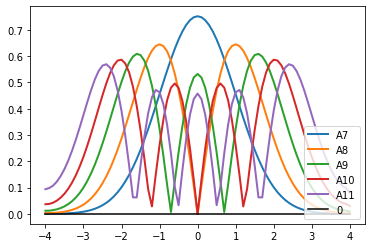

In [64]:
plt.plot(x_evals, A7, linewidth=2, label="A7")
plt.plot(x_evals, A8, linewidth=2, label="A8")
plt.plot(x_evals, A9, linewidth=2, label="A9")
plt.plot(x_evals, A10, linewidth=2, label="A10")
plt.plot(x_evals, A11, linewidth=2, label="A11")
plt.plot(x_evals, 0*x_evals, 'k', label="0")
plt.legend(loc="lower right")

### Problem 3

In [66]:
# Define the function
def rhs_ivp(x, y, ep, gamma):
    f1 = y[1]
    f2 = ((gamma*np.abs(y[0])**2)+x**2 - ep) * y[0]
    
    return np.array([f1,f2])

In [67]:
# Define some constants 
K = 1
L = 3
tol = 10**(-5) 

xp = [-L, L]
x_span = np.linspace(-L,L,20*L+1) 
gamma = [0.05, -0.05]

In [68]:
A15_18 = np.array([])
Eigenfunctions_all = np.array([])

for gamma in gamma:
    A = 0.000001
    ep_start = 0j
    ep = ep_start
    dep = K/100 
    y0 = np.array([A,(((K*L**2) - ep)**.5)*(A)])

    for modes in range(2):
        ep = ep_start
        dep = K/100

        for j in range(1000): # using for loop to make sure it stops. 
            # update initial condition
            y0 = np.array([A,((((K*L**2) - ep))**.5)*(A)])

            # solve ODE 
            sol = scipy.integrate.solve_ivp(lambda x,y: rhs_ivp(x,y,ep,gamma), xp, y0, t_eval = x_span)
            y_sol = sol.y[0,:] # f1 
            y_sol_dx = sol.y[1,:] #f2

            # define/compute norm and boundary conditions 
            norm = np.abs(scipy.integrate.trapz(y_sol**2,x_span)) #norm
            norm_tol = np.abs(scipy.integrate.trapz(y_sol**2,x_span)-1)
            boundary = np.abs(y_sol_dx[-1] + (((K*L**2)-ep)**.5)*y_sol[-1]) # same bc as problem 1 and 2. 
    #         boundary = np.abs(y_sol_dx[-1] + (((gamma*np.abs(y_sol[-1])**2)+(K*L**2)-ep)**.5)*y_sol[-1])

    # Norm Shooting 

            #if norm and boundary condiiton met, break, else A = A/sqrt(norm)
            if boundary < tol and norm_tol < tol:
                break
            else:
                A = A/np.sqrt(norm)
    #             print('norm:', norm)
    #             print('A:', A)

    # BC Shooting

            # update initial condition with new A 
            y0 = np.array([A,((((K*L**2) - ep))**.5)*(A)])

            # solve ODE 
            sol = scipy.integrate.solve_ivp(lambda x,y: rhs_ivp(x,y,ep,gamma), xp, y0, t_eval = x_span)
            y_sol = sol.y[0,:] # f1 
            y_sol_dx = sol.y[1,:] #f2 

            # define/compute norm and boundary conditions 
            norm = np.abs(scipy.integrate.trapz(y_sol**2,x_span)) #norm
            norm_tol = np.abs(scipy.integrate.trapz(y_sol**2,x_span)-1)
            boundary = np.abs(y_sol_dx[-1] + (((K*L**2)-ep)**.5)*y_sol[-1])

            if boundary < tol and norm_tol < tol:
                break

            if (-1)**(modes)*(y_sol_dx[-1] + (((K*L**2)-ep)**.5)*y_sol[-1]) > tol:
                ep = ep + dep # Increase 
            else:
                ep = ep - dep/2 # Decrease 
                dep = dep/2 # Cut dep in half to make sure we converge

        ep_start = ep + 0.1 
        A = A

        A15_18 = np.append(A15_18, ep)
        Eigenfunctions_all = np.append(Eigenfunctions_all, y_sol)

In [69]:
A15 = A15_18[0:2].reshape(1,2)
A18 = A15_18[2:4].reshape(1,2)

# print('eigenvalues for gamma = 0.05', A15)
# print('eigenvalues for gamma = 0', A15_18[4:46].reshape(1,2))
# print('eigenvalues for gamma = -0.05', A18)

In [70]:
A13 = np.abs(Eigenfunctions_all[0:61].reshape(61,1))

In [71]:
A14 = np.abs(Eigenfunctions_all[61:122].reshape(61,1))

In [72]:
A16 = np.abs(Eigenfunctions_all[122:183].reshape(61,1))

In [73]:
A17 = np.abs(Eigenfunctions_all[183:244].reshape(61,1))